# Part I: Exploratory Data Analysis - Prosper Loan
## by Adeyinka Abiola

## Introduction
> The propser loan data set contains 113,937 loans with 81 variables on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. The dataset contains information on peer to peer loans facilitated by Prosper credit company.

> The topic i would be exploring in this dataset is **What factors affects the borrower's APR or interest rate?**
It is known that there are certain factors that are normally looked at by credit companys when determining the interest rates for loans to be given to their borrowers, factors such as the borrowers credit score, their debt-to-income ratio, employment history, income, loan term, loan amount etc. This factors and more will be my basis for this exploration.

> The dataset contains about 81 variables and I will be sub selecting about 15 variables to explore to for this analysis.

## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from pywaffle import Waffle

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the dataset into a dataframe
df = pd.read_csv('prosperLoanData.csv')
df

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113932,E6D9357655724827169606C,753087,2013-04-14 05:55:02.663000000,NaN,36,Current,NaN,0.22354,0.1864,0.1764,...,-75.58,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
113933,E6DB353036033497292EE43,537216,2011-11-03 20:42:55.333000000,NaN,36,FinalPaymentInProgress,NaN,0.13220,0.1110,0.1010,...,-30.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,22
113934,E6E13596170052029692BB1,1069178,2013-12-13 05:49:12.703000000,NaN,60,Current,NaN,0.23984,0.2150,0.2050,...,-16.91,0.0,0.0,0.0,0.0,1.0,0,0,0.0,119
113935,E6EB3531504622671970D9E,539056,2011-11-14 13:18:26.597000000,NaN,60,Completed,2013-08-13 00:00:00,0.28408,0.2605,0.2505,...,-235.05,0.0,0.0,0.0,0.0,1.0,0,0,0.0,274


In [3]:
#displaying the first five rows in the dataframe
df.head()

,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [4]:
#overview and structure of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [5]:
#descriptive statistics for numeric variables
df.describe()

,ListingNumber,Term,BorrowerAPR,BorrowerRate,LenderYield,EstimatedEffectiveYield,EstimatedLoss,EstimatedReturn,ProsperRating (numeric),ProsperScore,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
count,1.139370e+05,113937.000000,113912.000000,113937.000000,113937.000000,84853.000000,84853.000000,84853.000000,84853.000000,84853.000000,...,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000,113937.000000
mean,6.278857e+05,40.830248,0.218828,0.192764,0.182701,0.168661,0.080306,0.096068,4.072243,5.950067,...,-54.725641,-14.242698,700.446342,681.420499,25.142686,0.998584,0.048027,0.023460,16.550751,80.475228
std,3.280762e+05,10.436212,0.080364,0.074818,0.074516,0.068467,0.046764,0.030403,1.673227,2.376501,...,60.675425,109.232758,2388.513831,2357.167068,275.657937,0.017919,0.332353,0.232412,294.545422,103.239020
min,4.000000e+00,12.000000,0.006530,0.000000,-0.010000,-0.182700,0.004900,-0.182700,1.000000,1.000000,...,-664.870000,-9274.750000,-94.200000,-954.550000,0.000000,0.700000,0.000000,0.000000,0.000000,1.000000
25%,4.009190e+05,36.000000,0.156290,0.134000,0.124200,0.115670,0.042400,0.074080,3.000000,4.000000,...,-73.180000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6.005540e+05,36.000000,0.209760,0.184000,0.173000,0.161500,0.072400,0.091700,4.000000,6.000000,...,-34.440000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,44.000000
75%,8.926340e+05,36.000000,0.283810,0.250000,0.240000,0.224300,0.112000,0.116600,5.000000,8.000000,...,-13.920000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,115.000000
max,1.255725e+06,60.000000,0.512290,0.497500,0.492500,0.319900,0.366000,0.283700,7.000000,11.000000,...,32.060000,0.000000,25000.000000,25000.000000,21117.900000,1.012500,39.000000,33.000000,25000.000000,1189.000000


This dataset has 81 variables and it is unrealistic to use all variables. We will be selecting 15 variables that are important for this exploration. 

We will use the data dictionary to assit with the selection of the relevant variables.
The data dictionary can be found using the link: https://docs.google.com/spreadsheets/d/1gDyi_L4UvIrLTEC6Wri5nbaMmkGmLQBk-Yx3z0XDEtI/edit#gid=0

### Variable Selection
We would be looking at the following columns/variables for the purpose of this analysis;


> - The variables that were selected and their descriptions are:
    - **Term** : The length of the loan expressed in months.
    - **LoanStatus** :   The current status of the loan: Cancelled,  Chargedoff, Completed, Current, Defaulted, FinalPaymentInProgress, PastDue. The PastDue status will be accompanied by a delinquency bucket.      
    - **BorrowerAPR**  :   The Borrower's Annual Percentage Rate (APR) for the loan.
    - **ProsperScore** :    A custom risk score built using historical Prosper data. The score ranges from 1-10, with 10 being the best, or lowest risk score.  Applicable for loans originated after July 2009.
    - **ListingCategory (numeric)**  :   The category of the listing that the borrower selected when posting their listing: 0 - Not Available, 1 - Debt Consolidation, 2 - Home Improvement, 3 - Business, 4 - Personal Loan, 5 - Student Use, 6 - Auto, 7- Other, 8 - Baby&Adoption, 9 - Boat, 10 - Cosmetic Procedure, 11 - Engagement Ring, 12 - Green Loans, 13 - Household Expenses, 14 - Large Purchases, 15 - Medical/Dental, 16 - Motorcycle, 17 - RV, 18 - Taxes, 19 - Vacation, 20 - Wedding Loans
    - **EmploymentStatus** : The employment status of the borrower at the time they posted the listing.
    - **EmploymentStatusDuration** :   The length in months of the employment status at the time the listing was created.
    - **IsBorrowerHomeowner**  :   A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner. 
    - **DebtToIncomeRatio**  :   The debt to income ratio of the borrower at the time the credit profile was pulled. This value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).    
    - **StatedMonthlyIncome** :  The monthly income the borrower stated at the time the listing was created.  
    - **LoanOriginalAmount**  : The origination amount of the loan.
    - **LoanOriginationDate** :  The date the loan was originated.  
    - **MonthlyLoanPayment** : The scheduled monthly loan payment.
    

In [6]:
target_variables = ['Term', 'LoanStatus', 'BorrowerAPR', 'ProsperScore', 'ListingCategory (numeric)', 'EmploymentStatus',
                    'EmploymentStatusDuration', 'IsBorrowerHomeowner', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'LoanOriginalAmount',
                    'LoanOriginationDate', 'MonthlyLoanPayment']

#extracting the variables we want to use and storing them in a seperate dataframe called 'sub_df'
sub_df = df[target_variables]

In [7]:
sub_df.head()

,Term,LoanStatus,BorrowerAPR,ProsperScore,ListingCategory (numeric),EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment
0,36,Completed,0.16516,NaN,0,Self-employed,2.0,True,0.17,3083.333333,9425,2007-09-12 00:00:00,330.43
1,36,Current,0.12016,7.0,2,Employed,44.0,False,0.18,6125.000000,10000,2014-03-03 00:00:00,318.93
2,36,Completed,0.28269,NaN,0,Not available,NaN,False,0.06,2083.333333,3001,2007-01-17 00:00:00,123.32
3,36,Current,0.12528,9.0,16,Employed,113.0,True,0.15,2875.000000,10000,2012-11-01 00:00:00,321.45
4,36,Current,0.24614,4.0,2,Employed,44.0,True,0.26,9583.333333,15000,2013-09-20 00:00:00,563.97


In [8]:
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Term                       113937 non-null  int64  
 1   LoanStatus                 113937 non-null  object 
 2   BorrowerAPR                113912 non-null  float64
 3   ProsperScore               84853 non-null   float64
 4   ListingCategory (numeric)  113937 non-null  int64  
 5   EmploymentStatus           111682 non-null  object 
 6   EmploymentStatusDuration   106312 non-null  float64
 7   IsBorrowerHomeowner        113937 non-null  bool   
 8   DebtToIncomeRatio          105383 non-null  float64
 9   StatedMonthlyIncome        113937 non-null  float64
 10  LoanOriginalAmount         113937 non-null  int64  
 11  LoanOriginationDate        113937 non-null  object 
 12  MonthlyLoanPayment         113937 non-null  float64
dtypes: bool(1), float64(6), int64

In [9]:
sub_df.describe()

,Term,BorrowerAPR,ProsperScore,ListingCategory (numeric),EmploymentStatusDuration,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,MonthlyLoanPayment
count,113937.000000,113912.000000,84853.000000,113937.000000,106312.000000,105383.000000,1.139370e+05,113937.00000,113937.000000
mean,40.830248,0.218828,5.950067,2.774209,96.071582,0.275947,5.608026e+03,8337.01385,272.475783
std,10.436212,0.080364,2.376501,3.996797,94.480605,0.551759,7.478497e+03,6245.80058,192.697812
min,12.000000,0.006530,1.000000,0.000000,0.000000,0.000000,0.000000e+00,1000.00000,0.000000
25%,36.000000,0.156290,4.000000,1.000000,26.000000,0.140000,3.200333e+03,4000.00000,131.620000
50%,36.000000,0.209760,6.000000,1.000000,67.000000,0.220000,4.666667e+03,6500.00000,217.740000
75%,36.000000,0.283810,8.000000,3.000000,137.000000,0.320000,6.825000e+03,12000.00000,371.580000
max,60.000000,0.512290,11.000000,20.000000,755.000000,10.010000,1.750003e+06,35000.00000,2251.510000


### Data Cleaning

In [10]:
#rename column names to be easier to type
sub_df.rename(columns={'ListingCategory (numeric)' : 'ListingCategory'}, inplace = True)

#Change the datatype of variables that are incorrectly assigned

#LoanOriginationDate should be datetime datatype
sub_df['LoanOriginationDate'] = pd.to_datetime(sub_df['LoanOriginationDate'])

#replace the missing values in ProsperScore with 0 to indicate 'Not available'
sub_df['ProsperScore'] = sub_df['ProsperScore'].fillna(0)

In [11]:
sub_df.head()

,Term,LoanStatus,BorrowerAPR,ProsperScore,ListingCategory,EmploymentStatus,EmploymentStatusDuration,IsBorrowerHomeowner,DebtToIncomeRatio,StatedMonthlyIncome,LoanOriginalAmount,LoanOriginationDate,MonthlyLoanPayment
0,36,Completed,0.16516,0.0,0,Self-employed,2.0,True,0.17,3083.333333,9425,2007-09-12,330.43
1,36,Current,0.12016,7.0,2,Employed,44.0,False,0.18,6125.000000,10000,2014-03-03,318.93
2,36,Completed,0.28269,0.0,0,Not available,NaN,False,0.06,2083.333333,3001,2007-01-17,123.32
3,36,Current,0.12528,9.0,16,Employed,113.0,True,0.15,2875.000000,10000,2012-11-01,321.45
4,36,Current,0.24614,4.0,2,Employed,44.0,True,0.26,9583.333333,15000,2013-09-20,563.97


In [12]:
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Term                      113937 non-null  int64         
 1   LoanStatus                113937 non-null  object        
 2   BorrowerAPR               113912 non-null  float64       
 3   ProsperScore              113937 non-null  float64       
 4   ListingCategory           113937 non-null  int64         
 5   EmploymentStatus          111682 non-null  object        
 6   EmploymentStatusDuration  106312 non-null  float64       
 7   IsBorrowerHomeowner       113937 non-null  bool          
 8   DebtToIncomeRatio         105383 non-null  float64       
 9   StatedMonthlyIncome       113937 non-null  float64       
 10  LoanOriginalAmount        113937 non-null  int64         
 11  LoanOriginationDate       113937 non-null  datetime64[ns]
 12  Mo

In [13]:
#dealing with the missing values in BorrowerAPR by replacing the missing values with the mean of BorrowerAPR
sub_df['BorrowerAPR'] = sub_df['BorrowerAPR'].fillna(sub_df['BorrowerAPR'].mean())
sub_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 13 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   Term                      113937 non-null  int64         
 1   LoanStatus                113937 non-null  object        
 2   BorrowerAPR               113937 non-null  float64       
 3   ProsperScore              113937 non-null  float64       
 4   ListingCategory           113937 non-null  int64         
 5   EmploymentStatus          111682 non-null  object        
 6   EmploymentStatusDuration  106312 non-null  float64       
 7   IsBorrowerHomeowner       113937 non-null  bool          
 8   DebtToIncomeRatio         105383 non-null  float64       
 9   StatedMonthlyIncome       113937 non-null  float64       
 10  LoanOriginalAmount        113937 non-null  int64         
 11  LoanOriginationDate       113937 non-null  datetime64[ns]
 12  Mo

### What is the structure of your dataset?

> The Original prosper dataset contains over 113k loans with 81 variables. I have selected 13 variables to be used to gain meaningful analysis. 

### What is/are the main feature(s) of interest in your dataset?

> The main features of interest in the dataset is the BorrowerAPR features.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> The features that will help support the investigation into the Borrowers APR are LoanOriginalAmount, MonthlyLoanPayment, DebtToOncomeRatio, EmploymentStatus, Term, LoanStatus. etc. 

## Univariate Exploration

>In this section, I will investigate distributions of individual variables starting with the main variable of interest then the supporting variables.

### 1. Main variable of interest is the BorrowerAPR
What is the distribution of the BorrowerAPR?


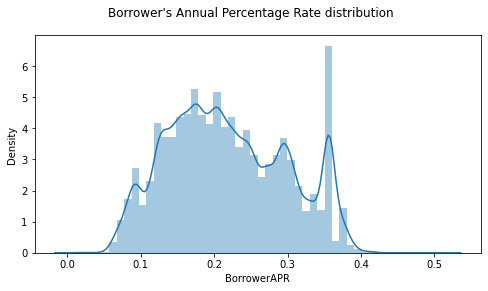

In [14]:
#Distribution of the BorrowerAPR feature
plt.figure(figsize=(8,4))
plt.suptitle("Borrower's Annual Percentage Rate distribution")
sb.distplot(sub_df['BorrowerAPR']);

Observation 1. The Borrowers annual percentage rate distribution appears to be multimodal

### 2. LoanOriginalAmount: The origination amount of the loan.

Question: What is the most frequently loaned amount?

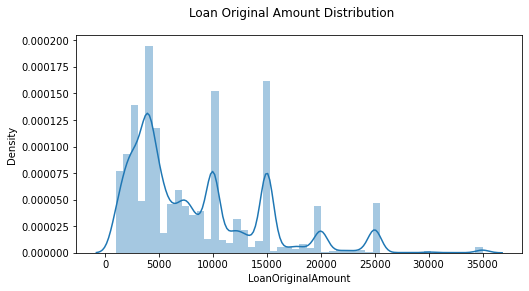

In [15]:
#Distribution of the BorrowerAPR feature
plt.figure(figsize=(8,4))
plt.suptitle("Loan Original Amount Distribution")
sb.distplot(sub_df['LoanOriginalAmount']);


In [16]:
sub_df.LoanOriginalAmount.value_counts().nlargest(5)

4000     14333
15000    12407
10000    11106
5000      6990
2000      6067
Name: LoanOriginalAmount, dtype: int64

Observation 2:

    - The loan amounts are mostly right skewed with different several peaks
    - The most frequently loaned amount is $ 4,000 

### 3. What loan term do majority of the  loans fall under?


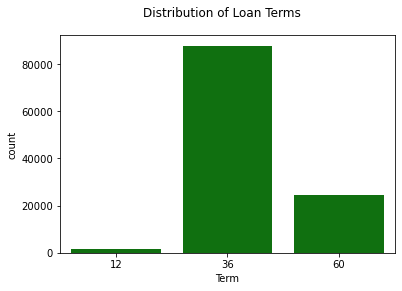

In [17]:
plt.suptitle("Distribution of Loan Terms")
sb.countplot(data = sub_df, x = 'Term', color = 'green');


Observation 3: The loan terms are split into 3 loan terms of 12 months, 26 months and 60 months with 36 months being the most frequently used term.

### 4. Loan Status of all the loans on Prosper Credit

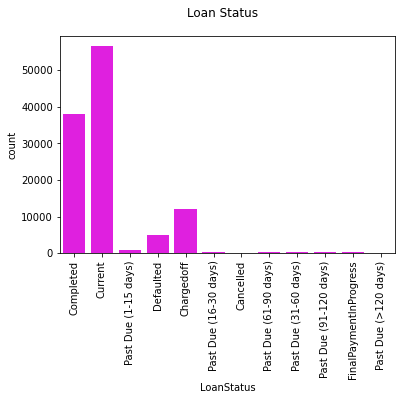

In [18]:
sb.countplot(data = sub_df, x = 'LoanStatus', color = 'magenta');
plt.xticks(rotation = 90)
plt.suptitle("Loan Status");

In [19]:
cat = (sub_df['LoanStatus'] == 'Completed') | (sub_df['LoanStatus'] == 'Chargedoff') | (sub_df['LoanStatus'] == 'Defaulted')
sub_df = sub_df[cat]

def change(row):
    if row['LoanStatus'] == 'Chargedoff':
        return 'Defaulted'
    else:
        return row['LoanStatus']
    
sub_df['LoanStatus'] = sub_df.apply(change, axis=1)
sub_df['LoanStatus'].value_counts()

Completed    38074
Defaulted    17010
Name: LoanStatus, dtype: int64

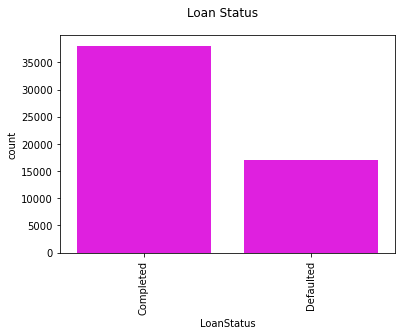

In [20]:
sb.countplot(data = sub_df, x = 'LoanStatus', color = 'magenta');
plt.xticks(rotation = 90)
plt.suptitle("Loan Status");

Observation 4: Most of the Loans have a current status with another substantial amount of loans have been completed. The past due loans are split into 6 groups in respect to the number of days they have exceeded. 

### 5. Listing Category distribution of the loans 


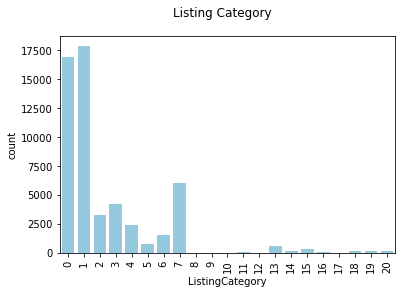

In [21]:
sb.countplot(data = sub_df, x = 'ListingCategory', color = 'skyblue');
plt.xticks(rotation = 90)
plt.suptitle("Listing Category");

Observation 5: The most frequently loan category applied for is Debt Consolidation

### 6 Employment Status of the borrowers


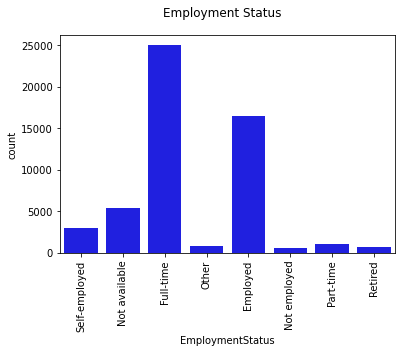

In [22]:
sb.countplot(data = sub_df, x = 'EmploymentStatus', color = "blue");
plt.xticks(rotation = 90)
plt.suptitle("Employment Status");

Observation 6: Most of the borrowers are employed

### 7. Distribution of Stated Monthly income

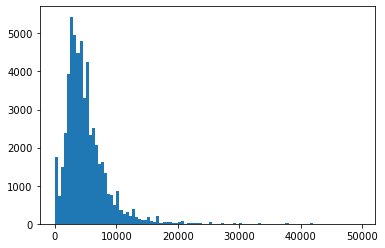

In [23]:
bins_smi = np.arange(0, 50000, 500)
plt.hist(data=sub_df, x='StatedMonthlyIncome', bins= bins_smi);

In [24]:
#obtaining the boundary to be used to zoom in the plot
income_std = sub_df['StatedMonthlyIncome'].std()
income_mean = sub_df['StatedMonthlyIncome'].mean()
boundary = income_mean + income_std * 3
len(sub_df[sub_df['StatedMonthlyIncome'] >= boundary])

343

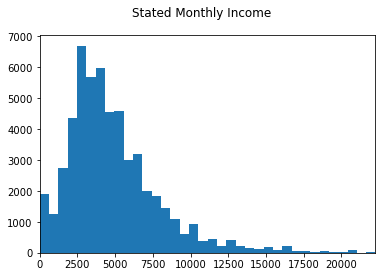

In [25]:

#zooming in the histogram using the boundary of the plot by using the mean and 3 parts standard deviation
plt.hist(data=sub_df, x='StatedMonthlyIncome', bins=1000);
plt.xlim(0, boundary)
plt.suptitle("Stated Monthly Income");

Observation 7: The distribution of monthly income is right skewed. The most frequent monthly income by borrowers seems to be about 5000 with most stated montly income less than 30000.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> The Borrowers annual percentage rate distribution appears to be multimodal.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> The loan amounts are mostly right skewed with different several peaks. The most frequently loaned amount is 4,000. The loan terms are split into 3 loan terms of 12 months, 26 months and 60 months with 36 months being the most frequently used term. Most of the Loans have a current status with another substantial amount of loans have been completed. The past due loans are split into 6 groups in respect to the number of days they have exceeded.The most frequently loan category applied for is Debt Consolidation. The distribution of monthly income is right skewed. The most frequent monthly income by borrowers seems to be about 5000 with most stated montly income less than 30000.

## Bivariate Exploration


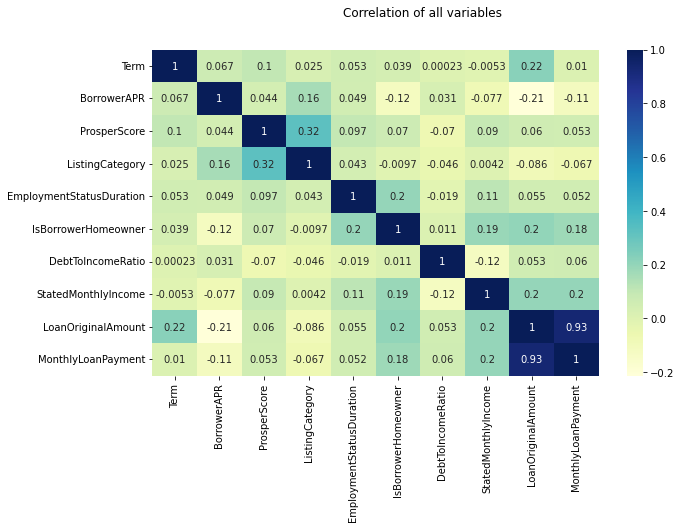

In [26]:
#Firstly Correlation plot between the all variables
plt.figure(figsize = [10, 6])
sb.heatmap(sub_df.corr(), cmap="YlGnBu", annot=True)
plt.suptitle("Correlation of all variables");

From the correlation heat map above there are some relationships i will like to explore further:

- **Term vs LoanOriginalAmount** with a possitive coefficient of 0.22
- **BorrowerAPR vs LoanOriginalAmount** with a negative coefficient of -0.21
- **EmploymentStatusDuration vs isBorrowerHomeOwner** with a postive coefficient of 0.2
- **isBorrowerHomeOwner vs LoanOriginalAmount** with a positive coefficient of 0.2
- **StatedMonthlyIncome vs LoanOriginalAmount** with a positive coefficient of 0.2
- **StatedMonthlyIncome vs MonthlyLoanPayment** with a positive coefficient of 0.2
- **LoanOriginalAmount vs MonthlyLoanPayment** with a positive coefficient of 0.93

### 1. Term vs LoanOriginalAmount
Question: How does the Loan amount requested for determine the term that the loan would be issued?

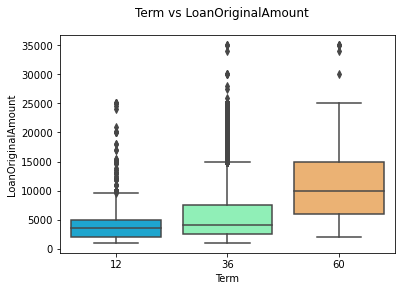

In [27]:
sb.boxplot(x='Term',y='LoanOriginalAmount',data=sub_df,palette='rainbow')
plt.suptitle("Term vs LoanOriginalAmount");

Observation 1: The higher the loan amount the higher the term status given for loan repayment

### 2. BorrowerAPR vs LoanOriginalAmount
Question: How does the Loan amount affect the borrowers annual rate percentage?

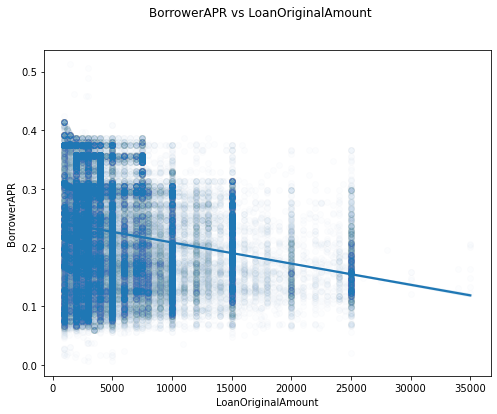

In [28]:
plt.figure(figsize = [8, 6])
sb.regplot(x = 'LoanOriginalAmount' , y = 'BorrowerAPR', data = sub_df, scatter_kws={'alpha':0.01})
plt.suptitle("BorrowerAPR vs LoanOriginalAmount");

Observation 2: The higher the loan amount obtained the lower the borrowers annual percentage rate

### 3. EmploymentStatusDuration vs isBorrowerHomeOwner
Question: How does a homeowner and non homeowner compare in terms of the duration of their employment?

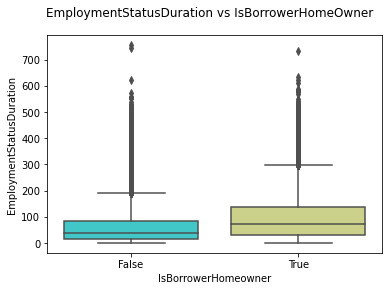

In [29]:
sb.boxplot(x="IsBorrowerHomeowner", y="EmploymentStatusDuration", data=sub_df,palette='rainbow')
plt.suptitle("EmploymentStatusDuration vs IsBorrowerHomeOwner");

Observation 3: It is obvious that borrowers that own homes have more employment history than their counterparts
    

### 4. isBorrowerHomeOwner vs LoanOriginalAmount
Question: What is the distribution of the amount that was loaned by homeowners and those that were loaned by their counterparts?

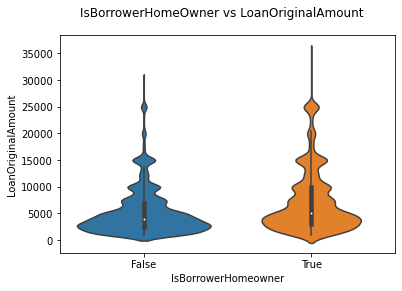

In [30]:
sb.violinplot(x="IsBorrowerHomeowner", y="LoanOriginalAmount", data=sub_df)
plt.suptitle("IsBorrowerHomeOwner vs LoanOriginalAmount");

Observation 4: From the graph, it shows that non-homeowners majorly loaned amounts between the ranges of 0 - 5000 with a max of 30000. While most home owners were spread across different amounts betwwen the range of 5000 and above.

### 5. StatedMonthlyIncome vs LoanOriginalAmount
Question: How does the monthly income of a borrower vary with the amount of loan they request for?

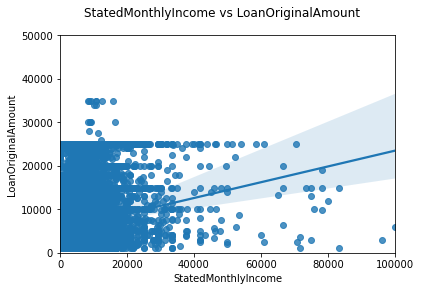

In [31]:
sb.regplot(x = 'StatedMonthlyIncome', y = 'LoanOriginalAmount', data = sub_df)
plt.xlim([0, 100000])
plt.ylim([0, 50000])
plt.suptitle("StatedMonthlyIncome vs LoanOriginalAmount");

Observation 5: Borrowers with higher monthly income have higher loan amounts

### 6. StatedMonthlyIncome vs MonthlyLoanPayment
Question: How do borrowers monthly income affect their monthly loan repayment amounts?

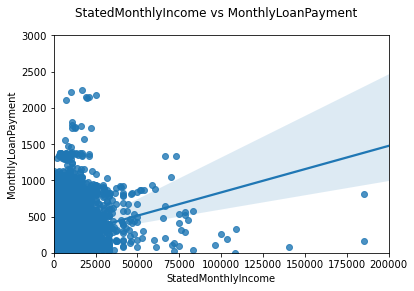

In [32]:
sb.regplot(x = 'StatedMonthlyIncome', y = 'MonthlyLoanPayment', data = sub_df)
plt.xlim([0, 200000])
plt.ylim([0, 3000])
plt.suptitle("StatedMonthlyIncome vs MonthlyLoanPayment");

Observation 6: Borrowers with higher monthly income are able to pay higher monthly loan repayments.

### 7. LoanOriginalAmount vs MonthlyLoanPayment
Question: How does the amount of loan issued vary on the monthly repayment amount?

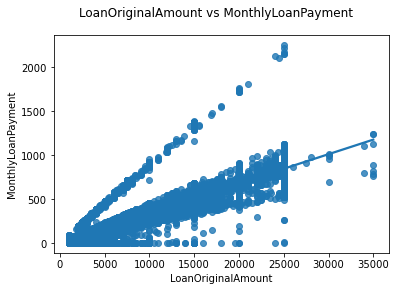

In [33]:
sb.regplot(x = 'LoanOriginalAmount', y = 'MonthlyLoanPayment', data = sub_df)
plt.suptitle("LoanOriginalAmount vs MonthlyLoanPayment");

Observation 7: The higher the loan amount the higher the monthly repayment amount
    

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> - Borrower Rate is negatvely correlated with the loan original amount. The higher the loan amount obtained the lower the borrowers annual rate percentage. The higher the loan amount the higher the term status given for loan repayment. Borrowers with higher monthly income have higher loan amounts. Borrowers with higher monthly income are able to pay higher monthly loan repayments. The higher the loan amount the higher the monthly repayment amount

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> It is obvious that borrowers that own homes have more employment history than their counterparts and non-homeowners majorly loaned amounts between the ranges of 0 - 5000 with a max of 30000. While most home owners were spread across different amounts betwwen the range of 5000 and above.

## Multivariate Exploration


There are 2 things i want to explore:
1. Effect the term has on the loan amount and the Borrowers Annual rate percentage
2. Effect the term has on the loan amount and monthly loan payment

### 1. LoanOriginalAmount vs BorrowerAPR vs Term

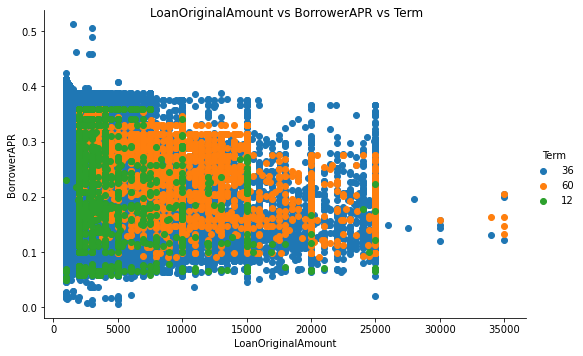

In [34]:
g = sb.FacetGrid(data = sub_df, hue = 'Term',hue_order = [36, 60, 12], size = 5, aspect = 1.5)
g.map(plt.scatter, 'LoanOriginalAmount', 'BorrowerAPR')
g.add_legend()
plt.suptitle("LoanOriginalAmount vs BorrowerAPR vs Term");

Observation 1: The 36 months term loans have borrowers annual rate percentage between 0 - 0.4 with a few outliers going to 0.5, Loans for 60 months term are concentrated more on the higher loan amounts and borrowers APR between 0.1 - 0.35, while the 12 months loan term are majorly for lowe loan amounts with a borrowerAPR between 0 - 0.35.

### 2: LoanOriginalAmount vs MonthlyLoanPayment vs Term
Question: Will the monthly loan payments for the different terms be similar?

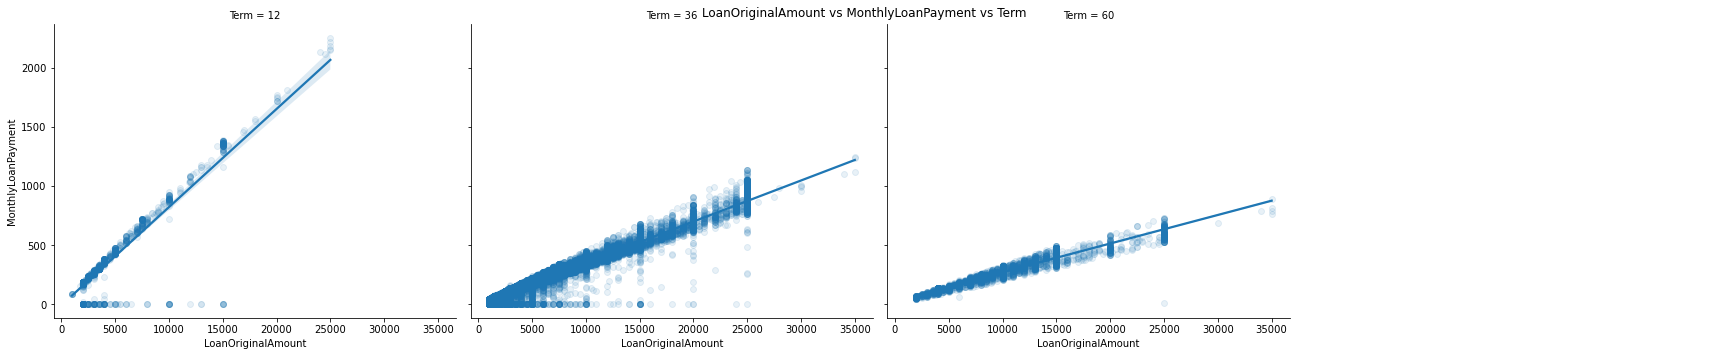

In [38]:

g=sb.FacetGrid(data=sub_df, aspect=1.2, height=5, col='Term', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'MonthlyLoanPayment', x_jitter=0.04, scatter_kws={'alpha':0.1});
g.add_legend()
plt.suptitle("LoanOriginalAmount vs MonthlyLoanPayment vs Term");

Observation 2: From the regression graph above: We can see the effect of the loan terms on the Monthly loan payment to be paid back depending on loan amount.
        - For loans that cover only 12 months, the monthly fee tends to be more than the other terms since it is a shorter term.
    While the loans are more spread across for loan terms of 60 months.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> The 36 months term loans have borrowers annual percentage rate between 0 - 0.4 with a few outliers going to 0.5, Loans for 60 months term are concentrated more on the higher loan amounts and borrowers APR between 0.1 - 0.35, while the 12 months loan term are majorly for lowe loan amounts with a borrowerAPR between 0 - 0.35. Although, the term didn't have a significant relationship to strentheng the effects on the Borrowers annual percentage rate.

### Were there any interesting or surprising interactions between features?

> The effect of the loan terms on the Monthly loan payment to be paid back depending on loan amount was an interesting find. - For loans that cover only 12 months, the monthly fee tends to be more than the other terms since it is a shorter term. While the loans are more spread across for loan terms of 60 months.